## **MVP Análise de Dados e Boas Práticas**
Nome: Antônio Marcos Jander Chaboudt

Matrícula: 4052024001511

Dataset: Dataset (pessoal)

# MVP: Análise e Modelagem de Desempenho Olímpico nas Provas de 400m e 400m com Barreiras

# 1. Introdução

## 1.1 Contexto das Provas

As provas de **400 metros rasos** e **400 metros com barreiras** ocupam um papel central no programa olímpico do atletismo, exigindo dos atletas um equilíbrio complexo entre **velocidade**, **resistência anaeróbica** e **estratégia de ritmo**. O evento de 400 metros rasos é a mais longa das provas de velocidade pura, desafiando os atletas a manterem intensidade máxima ao longo de uma volta completa na pista. Já os 400 metros com barreiras, além da exigência física semelhante, introduzem obstáculos técnicos que demandam **coordenação motora refinada** e **distribuição eficiente do esforço** ao longo do percurso.

Historicamente, essas provas têm sido palco de grandes performances, com recordes sendo quebrados ao longo das décadas e com representatividade significativa de atletas de diferentes continentes. A análise quantitativa e qualitativa do desempenho nessas provas, considerando fatores físicos, ambientais e contextuais, pode fornecer **insights valiosos** para atletas, treinadores e pesquisadores da área esportiva.

---

## 1.2 Justificativa e Relevância do Estudo

Com a crescente disponibilidade de **dados esportivos** e o avanço das técnicas de **ciência de dados aplicadas ao esporte**, torna-se possível explorar de forma mais aprofundada os fatores que influenciam o desempenho de atletas de alto rendimento. No caso das provas de 400m e 400m com barreiras, compreender a **evolução histórica dos tempos**, identificar os **perfis mais frequentes entre os finalistas olímpicos** e, finalmente, **prever o tempo de prova** com base em variáveis físicas e contextuais são etapas fundamentais para transformar dados em conhecimento aplicável.

Além do valor acadêmico, este estudo tem **relevância prática** para o cenário esportivo, contribuindo com informações que podem auxiliar na **identificação de talentos**, na elaboração de **planos de treinamento** e no **planejamento estratégico de competições**. O uso de ferramentas de **análise exploratória**, **pré-processamento** e **modelagem preditiva** neste contexto amplia a interface entre ciência de dados e ciências do esporte.

---

## 1.3 Objetivo Geral

Investigar e modelar o desempenho de atletas olímpicos nas provas de **400 metros rasos** e **400 metros com barreiras**, com base na **evolução histórica**, no **perfil dos finalistas** e nas **variáveis que influenciam diretamente o tempo de prova**.

---

## 1.4 Objetivos Específicos

- Analisar a **evolução temporal** dos tempos de prova nas finais olímpicas de 400m e 400m com barreiras, considerando **sexo** e **país** dos atletas.
- Caracterizar os **perfis físicos e contextuais** mais frequentes entre os finalistas olímpicos dessas provas.
- Desenvolver modelos de **classificação** para identificar atletas com maior probabilidade de se tornarem finalistas olímpicos.
- Construir modelos de **regressão** capazes de prever o **tempo final de prova** com base em características físicas e condições ambientais.

## 2. Descrição dos Dados

### 2.1 Descrição do Problema

O objetivo deste projeto é analisar o desempenho de atletas olímpicos nas provas de 400 metros rasos e 400 metros com barreiras, com foco na evolução dos tempos ao longo das edições dos Jogos Olímpicos, na identificação dos perfis dos finalistas e na predição de resultados futuros. A proposta é explorar, classificar e prever o desempenho desses atletas com base em variáveis como sexo, país, tipo de prova e tempo final registrado.

### 2.2 Hipóteses do Problema

- **H1:** O tempo médio dos atletas nas finais olímpicas de 400m e 400m com barreiras tem melhorado ao longo das décadas.
- **H2:** Existem padrões específicos (por exemplo, país ou sexo) entre os atletas que conquistam medalhas ou se classificam como finalistas.
- **H3:** É possível prever o tempo final de um atleta com base em variáveis contextuais (como tipo de prova, sexo e país).
- **H4:** A distribuição de medalhas em provas de 400m e 400m com barreiras apresenta concentração em determinadas nações.

### 2.3 Tipo de Problema

O projeto abrange **dois tipos principais de problemas de aprendizado de máquina**:

- **Classificação**: Identificar se um atleta será finalista olímpico com base em seus atributos (binário: finalista ou não).
- **Regressão**: Prever o tempo final que um atleta alcançará na prova, com base em variáveis contextuais.

Ambos os problemas são supervisionados, ou seja, o modelo aprende com base em dados rotulados.

- Fonte dos dados (https://github.com/antoniochaboudt/MVP_Analise_de_dados/blob/main/Dataset.xlsx)

### 📌 2.5 Atributos do Dataset

| Atributo           | Descrição                                                                 |
|--------------------|---------------------------------------------------------------------------|
| **Edition**        | Edição dos Jogos Olímpicos (ex: 2016 Rio de Janeiro)                      |
| **Event**          | Nome da prova (400m ou 400m hurdles)                                      |
| **Gender**         | Sexo do atleta (M = masculino, F = feminino)                              |
| **Medal**          | Medalha conquistada (Gold, Silver, Bronze), ou `NaN` se não medalhou      |
| **Person**         | Nome completo do(a) atleta                                                 |
| **Country**        | Sigla do país representado (ex: USA, KEN, BRA)                            |
| **Result**         | Tempo final registrado na prova (em segundos)                             |

### 📌 2.6 Atributos Derivados (criadas durante o projeto)

| Atributo           | Descrição                                                                 |
|--------------------|---------------------------------------------------------------------------|
| **Tipo_Prova**     | Tipo da prova (rasos ou barreiras)                                        |
| **Sexo**           | Sexo padronizado (M ou F)                                                 |
| **Resultado_float**| Conversão do tempo da prova para formato numérico (float)                 |
| **Finalista**      | Variável binária: 1 para medalhistas (Top 3), 0 para demais atletas        |

In [9]:
# Importações da Bibliotecas necessarias para a analise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import train_test_split

In [10]:
## Importação dos dados
# Link do arquivo no GitHub (RAW)
url = 'https://github.com/antoniochaboudt/MVP_Analise_de_dados/raw/main/Dataset.xlsx'

# Ler o arquivo Excel diretamente da URL, especificando o motor
df = pd.read_excel(url, engine='openpyxl')

# Verificar as primeiras linhas
display(df.head())

,Date,Competition,CompetitionSet,Comp.SetDetail,Sport,Discipline,Gender,Class,Rank,Medal,...,Continent,Result,Sec/Mtr/Pts,Host City,Host Country,Host Continent,# Participants,# Countries,# Continents,Rank Within Country
0,2014-10-01,Asian Games,Asian Games,Asian Games,Athletics,400m Hurdles,Men,Seniors,1,G,...,Asia,49.71,49.71,Incheon,Republic of Korea,Asia,17,13,1,1
1,2014-10-01,Asian Games,Asian Games,Asian Games,Athletics,400m Hurdles,Men,Seniors,2,S,...,Asia,49.81,49.81,Incheon,Republic of Korea,Asia,17,13,1,1
2,2014-10-01,Asian Games,Asian Games,Asian Games,Athletics,400m Hurdles,Men,Seniors,3,B,...,Asia,50.29,50.29,Incheon,Republic of Korea,Asia,17,13,1,1
3,2014-10-01,Asian Games,Asian Games,Asian Games,Athletics,400m Hurdles,Men,Seniors,4,NaN,...,Asia,50.8,50.80,Incheon,Republic of Korea,Asia,17,13,1,1
4,2014-10-01,Asian Games,Asian Games,Asian Games,Athletics,400m Hurdles,Men,Seniors,5,NaN,...,Asia,51.1,51.10,Incheon,Republic of Korea,Asia,17,13,1,1


In [12]:
# Dicionário de tradução das colunas
colunas_traduzidas = {
    'Date': 'Data',
    'Competition': 'Competição',
    'CompetitionSet': 'Conjunto_Competição',
    'Comp.SetDetail': 'Detalhe_Competição',
    'Sport': 'Esporte',
    'Discipline': 'Prova',
    'Gender': 'Sexo',
    'Class': 'Classe',
    'Rank': 'Colocação',
    'Medal': 'Medalha',
    'Country': 'País',
    'Code': 'Código_País',
    'Continent': 'Continente',
    'Result': 'Resultado',
    'Sec/Mtr/Pts': 'Seg_Por_Metro_Pontos',
    'Host City': 'Cidade_Sede',
    'Host Country': 'País_Sede',
    'Host Continent': 'Continente_Sede',
    '# Participants': 'Participantes',
    '# Countries': 'Num_Países',
    '# Continents': 'Num_Continentes',
    'Rank Within Country': 'Ranking_País'
}

# Renomear colunas
df.rename(columns=colunas_traduzidas, inplace=True)

# Visualizar o DataFrame com colunas traduzidas
df.head()


,Data,Competição,Conjunto_Competição,Detalhe_Competição,Esporte,Prova,Sexo,Classe,Colocação,Medalha,...,Continente,Resultado,Seg_Por_Metro_Pontos,Cidade_Sede,País_Sede,Continente_Sede,Participantes,Num_Países,Num_Continentes,Ranking_País
0,2014-10-01,Asian Games,Asian Games,Asian Games,Athletics,400m Hurdles,Men,Seniors,1,G,...,Asia,49.71,49.71,Incheon,Republic of Korea,Asia,17,13,1,1
1,2014-10-01,Asian Games,Asian Games,Asian Games,Athletics,400m Hurdles,Men,Seniors,2,S,...,Asia,49.81,49.81,Incheon,Republic of Korea,Asia,17,13,1,1
2,2014-10-01,Asian Games,Asian Games,Asian Games,Athletics,400m Hurdles,Men,Seniors,3,B,...,Asia,50.29,50.29,Incheon,Republic of Korea,Asia,17,13,1,1
3,2014-10-01,Asian Games,Asian Games,Asian Games,Athletics,400m Hurdles,Men,Seniors,4,NaN,...,Asia,50.8,50.80,Incheon,Republic of Korea,Asia,17,13,1,1
4,2014-10-01,Asian Games,Asian Games,Asian Games,Athletics,400m Hurdles,Men,Seniors,5,NaN,...,Asia,51.1,51.10,Incheon,Republic of Korea,Asia,17,13,1,1


In [13]:
#Conversão de colunas importantes
# Converter a coluna Data para tipo datetime e extrair o ano
df['Ano'] = pd.to_datetime(df['Data'], errors='coerce').dt.year

# Tentar converter Resultado para número (float)
df['Resultado_float'] = pd.to_numeric(df['Resultado'], errors='coerce')

# Visualizar tipos e presença de nulos
df[['Ano', 'Resultado', 'Resultado_float']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ano              28630 non-null  int32  
 1   Resultado        26772 non-null  object 
 2   Resultado_float  25889 non-null  float64
dtypes: float64(1), int32(1), object(1)
memory usage: 559.3+ KB


In [14]:
print(f"Total de instâncias: {len(df)}")
print("\nTipos de dados por coluna:")
print(df.info())

Total de instâncias: 28630

Tipos de dados por coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28630 entries, 0 to 28629
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Data                  28630 non-null  datetime64[ns]
 1   Competição            28630 non-null  object        
 2   Conjunto_Competição   27887 non-null  object        
 3   Detalhe_Competição    27887 non-null  object        
 4   Esporte               28630 non-null  object        
 5   Prova                 28630 non-null  object        
 6   Sexo                  28630 non-null  object        
 7   Classe                28630 non-null  object        
 8   Colocação             28630 non-null  object        
 9   Medalha               6990 non-null   object        
 10  Team Members          28630 non-null  object        
 11  Person                28630 non-null  object        
 12  Age                

### Analise de Dados

In [15]:
# estatísticas descritivas básicas do dataset
df.describe()

,Data,Age,Seg_Por_Metro_Pontos,Participantes,Num_Países,Num_Continentes,Ranking_País,Ano,Resultado_float
count,28630,28260.000000,26772.000000,28630.000000,28630.000000,28630.000000,28630.000000,28630.000000,25889.000000
mean,2011-10-06 12:01:03.374083328,24.075018,50.979206,25.615159,16.359064,3.367097,1.562138,2011.213098,50.550533
min,1896-04-07 00:00:00,13.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1896.000000,1.000000
25%,2007-07-15 00:00:00,21.000000,48.110000,8.000000,6.000000,2.000000,1.000000,2007.000000,47.980000
50%,2014-03-22 00:00:00,24.000000,50.660000,16.000000,10.000000,3.000000,1.000000,2014.000000,50.480000
75%,2018-09-04 00:00:00,27.000000,53.970000,38.000000,27.000000,5.000000,2.000000,2018.000000,53.490000
max,2025-06-20 00:00:00,40.000000,157.210000,153.000000,57.000000,7.000000,43.000000,2025.000000,69.400000
std,NaN,4.331870,5.565198,24.733244,13.538218,1.925467,1.795269,12.202655,4.975761


In [16]:
# Agrupa por 'prova' e 'sexo'
grupos = df.groupby(['Prova', 'Sexo'])

# Cria um dicionário para armazenar os resultados
tabelas_descritivas = {}

# Itera sobre os grupos
for (prova, sexo), grupo in grupos:
    descricao = grupo.describe()
    chave = f'Prova_{prova}_Sexo_{sexo}'
    print(f'\n📊 Estatísticas descritivas para Prova: {prova} | Sexo: {sexo}\n')
    display(descricao)
    tabelas_descritivas[chave] = descricao


📊 Estatísticas descritivas para Prova: 400m | Sexo: Men



,Data,Age,Seg_Por_Metro_Pontos,Participantes,Num_Países,Num_Continentes,Ranking_País,Ano,Resultado_float
count,10636,10459.000000,9841.000000,10636.000000,10636.000000,10636.000000,10636.000000,10636.000000,9828.000000
mean,2011-05-19 18:02:34.343738368,23.880581,47.384886,27.793061,17.578413,3.374295,1.630030,2010.833960,47.322889
min,1896-04-07 00:00:00,14.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1896.000000,1.000000
25%,2007-08-31 00:00:00,21.000000,45.630000,8.000000,6.000000,1.000000,1.000000,2007.000000,45.630000
50%,2014-06-26 00:00:00,24.000000,46.950000,21.000000,11.000000,3.000000,1.000000,2014.000000,46.950000
75%,2018-08-10 00:00:00,27.000000,49.080000,41.000000,28.000000,6.000000,2.000000,2018.000000,49.070000
max,2025-06-09 00:00:00,38.000000,157.210000,143.000000,57.000000,7.000000,25.000000,2025.000000,69.400000
std,NaN,4.068145,4.114197,23.576154,14.503951,1.969799,1.705964,13.268089,3.552696



📊 Estatísticas descritivas para Prova: 400m | Sexo: Women



,Data,Age,Seg_Por_Metro_Pontos,Participantes,Num_Países,Num_Continentes,Ranking_País,Ano,Resultado_float
count,6583,6528.000000,6217.000000,6583.000000,6583.000000,6583.000000,6583.000000,6583.000000,6084.000000
mean,2012-01-21 00:08:44.988606976,23.862132,52.704945,27.096764,16.479265,3.459061,1.680997,2011.501139,52.476989
min,1958-08-24 00:00:00,13.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1958.000000,1.000000
25%,2007-07-13 00:00:00,21.000000,51.180000,8.000000,5.000000,2.000000,1.000000,2007.000000,51.160000
50%,2013-07-12 00:00:00,24.000000,52.300000,15.000000,10.000000,3.000000,1.000000,2013.000000,52.260000
75%,2018-09-08 00:00:00,27.000000,54.090000,41.000000,29.000000,6.000000,2.000000,2018.000000,53.930000
max,2025-06-20 00:00:00,40.000000,80.480000,153.000000,51.000000,7.000000,43.000000,2025.000000,59.990000
std,NaN,4.455591,4.451276,29.003985,13.548258,1.986230,2.498681,10.631202,4.186562



📊 Estatísticas descritivas para Prova: 400m Hurdles | Sexo: Men



,Data,Age,Seg_Por_Metro_Pontos,Participantes,Num_Países,Num_Continentes,Ranking_País,Ano,Resultado_float
count,6285,6193.000000,5848.000000,6285.000000,6285.000000,6285.000000,6285.000000,6285.000000,5800.000000
mean,2010-10-07 20:17:04.152744704,24.152592,50.434600,23.705648,16.049324,3.360859,1.390453,2010.217979,50.292871
min,1900-07-15 00:00:00,14.000000,1.000000,3.000000,1.000000,1.000000,0.000000,1900.000000,1.000000
25%,2006-08-18 00:00:00,21.000000,49.050000,8.000000,6.000000,2.000000,1.000000,2006.000000,49.040000
50%,2013-06-30 00:00:00,24.000000,50.020000,12.000000,9.000000,3.000000,1.000000,2013.000000,50.000000
75%,2018-08-12 00:00:00,27.000000,51.670000,36.000000,26.000000,5.000000,2.000000,2018.000000,51.600000
max,2025-06-20 00:00:00,39.000000,129.370000,128.000000,54.000000,6.000000,17.000000,2025.000000,59.590000
std,NaN,4.372712,4.270199,22.699394,13.170627,1.834910,1.100592,14.022938,3.854689



📊 Estatísticas descritivas para Prova: 400m Hurdles | Sexo: Women



,Data,Age,Seg_Por_Metro_Pontos,Participantes,Num_Países,Num_Continentes,Ranking_País,Ano,Resultado_float
count,5126,5080.000000,4866.000000,5126.000000,5126.000000,5126.000000,5126.000000,5126.000000,4177.000000
mean,2013-05-27 13:38:19.336714752,24.654331,56.697996,21.534725,14.054428,3.241709,1.479126,2012.849980,55.696610
min,1978-09-02 00:00:00,15.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1978.000000,1.000000
25%,2008-07-11 00:00:00,22.000000,55.010000,8.000000,6.000000,2.000000,1.000000,2008.000000,54.850000
50%,2014-07-26 00:00:00,25.000000,56.250000,9.000000,8.000000,3.000000,1.000000,2014.000000,55.880000
75%,2019-08-29 00:00:00,28.000000,58.220000,33.000000,23.000000,5.000000,2.000000,2019.000000,57.200000
max,2025-06-15 00:00:00,38.000000,91.220000,126.000000,48.000000,7.000000,25.000000,2025.000000,59.980000
std,NaN,4.585625,5.094587,22.756189,11.417025,1.853857,1.546121,8.713719,4.594646


### Evolução Histórica do Desempenho

/tmp/ipython-input-17-850632298.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Ano', y='Resultado_float', hue='Prova', ci=None)


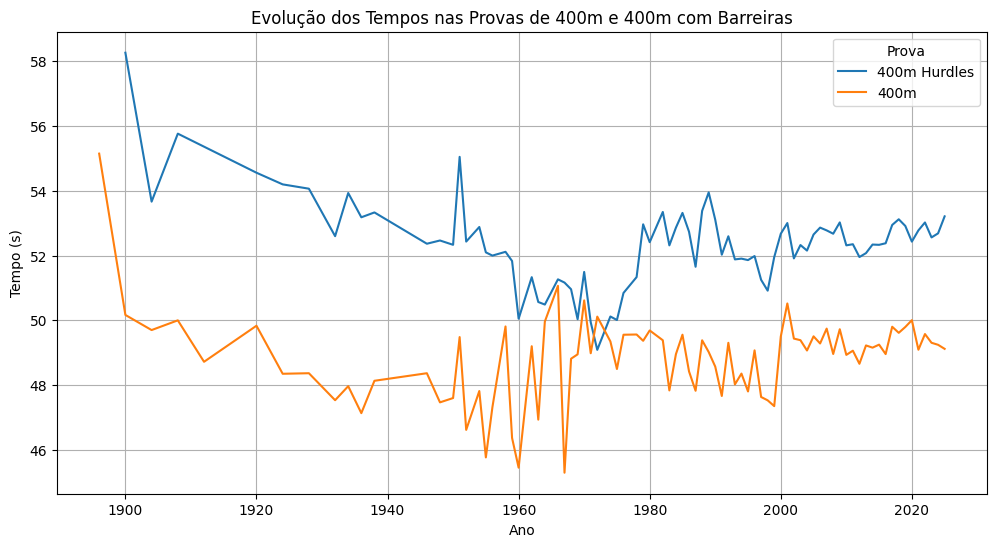

In [17]:
# Visualização: Evolução temporal dos tempos por prova

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Ano', y='Resultado_float', hue='Prova', ci=None)
plt.title('Evolução dos Tempos nas Provas de 400m e 400m com Barreiras')
plt.xlabel('Ano')
plt.ylabel('Tempo (s)')
plt.grid(True)
plt.legend(title='Prova')
plt.show()

In [21]:
# Filtrar apenas registros válidos
df_validos = df[df['Resultado_float'].notnull()].copy()

# Garantir ordenação por ano
df_validos = df_validos.sort_values('Ano')

# Agrupar por Prova e Sexo
agrupamentos = df_validos.groupby(['Prova', 'Sexo'])

print("📊 Melhoria percentual por prova e sexo:\n")

for (prova, sexo), grupo in agrupamentos:
    grupo_ordenado = grupo.sort_values('Ano')
    tempo_inicial = grupo_ordenado.iloc[0]['Resultado_float']
    tempo_final = grupo_ordenado.iloc[-1]['Resultado_float']
    melhoria = (tempo_inicial - tempo_final) / tempo_inicial * 100

    print(f"{prova} - {sexo}: Melhorou {melhoria:.2f}% ({tempo_inicial:.2f}s → {tempo_final:.2f}s)")



📊 Melhoria percentual por prova e sexo:

400m - Men: Melhorou 18.18% (55.60s → 45.49s)
400m - Women: Melhorou 12.30% (55.70s → 48.85s)
400m Hurdles - Men: Melhorou 12.20% (57.60s → 50.57s)
400m Hurdles - Women: Melhorou 0.78% (55.14s → 54.71s)


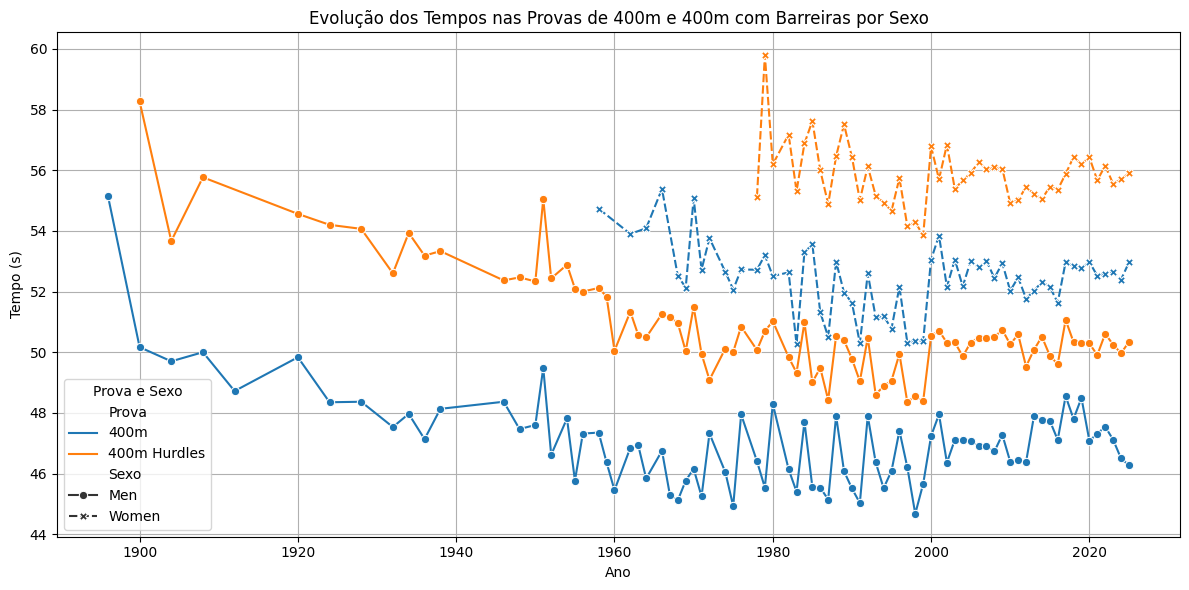

In [20]:
# Filtrar apenas dados válidos
df_plot = df[df['Resultado_float'].notnull()].copy()

# Agrupar por Ano, Prova e Sexo → média dos tempos por edição
df_medias = df_plot.groupby(['Ano', 'Prova', 'Sexo'])['Resultado_float'].mean().reset_index()

# Plotar
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_medias, x='Ano', y='Resultado_float', hue='Prova', style='Sexo', markers=True)

plt.title('Evolução dos Tempos nas Provas de 400m e 400m com Barreiras por Sexo')
plt.xlabel('Ano')
plt.ylabel('Tempo (s)')
plt.grid(True)
plt.legend(title='Prova e Sexo')
plt.tight_layout()
plt.show()


A evolução dos tempos nas finais olímpicas das provas de 400 metros rasos e 400 metros com barreiras mostra uma tendência clara de melhora ao longo das décadas.

A redução percentual no tempo médio foi:

- **400m masculino**: 18.18% (55.60s → 45.49s)
- **400m feminino**: 12.30% (55.70s → 48.85s)
- **400m com barreiras masculino**: 12.20% (57.60s → 50.57s)
- **400m com barreiras feminino**: 0.78% (55.14s → 54.71s)

Essa evolução pode ser atribuída a fatores como:
- Avanços em tecnologia de calçados e pistas,
- Melhoria na preparação física e métodos de treinamento,
- Maior profissionalização e especialização de atletas.

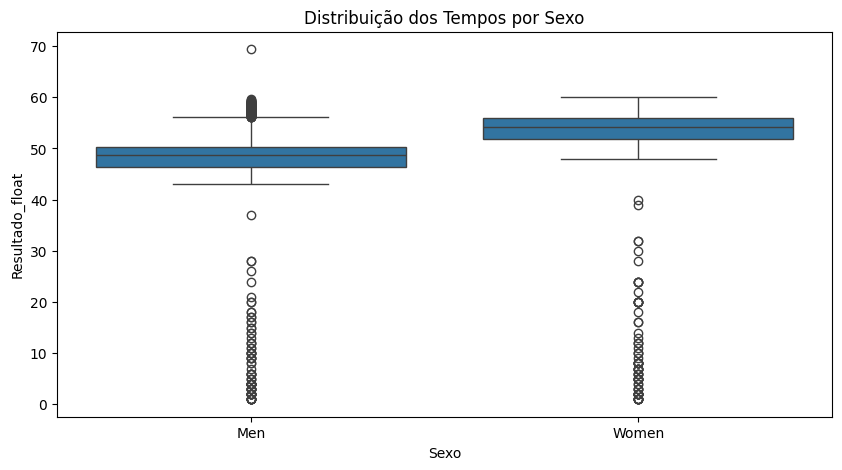

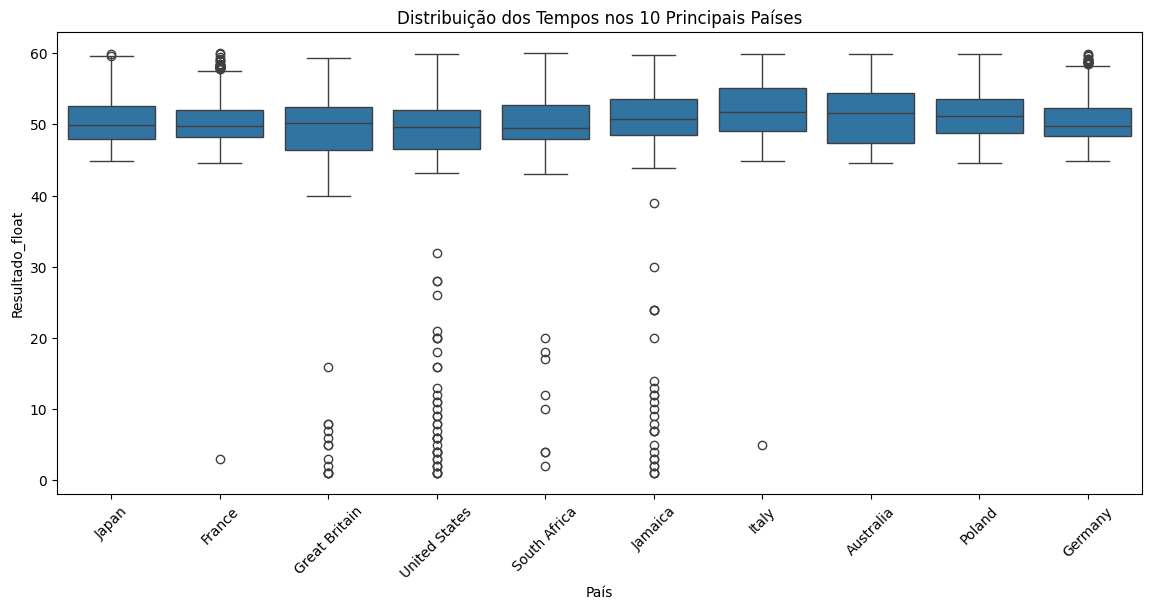

In [30]:
#Bloxplot por sexo e pais
# Boxplot por sexo
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Sexo', y='Resultado_float')
plt.title('Distribuição dos Tempos por Sexo')
plt.show()

# Boxplot por país (exibir os 10 mais frequentes)
top_paises = df['País'].value_counts().nlargest(10).index
df_top_paises = df[df['País'].isin(top_paises)]

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_top_paises, x='País', y='Resultado_float')
plt.title('Distribuição dos Tempos nos 10 Principais Países')
plt.xticks(rotation=45)
plt.show()

### Distribuição dos tempos por sexo

A distribuição dos tempos de prova entre homens (Men) e mulheres (Women), em todas as edições e provas combinadas.

Os homens apresentaram tempos médios menores, com menor variabilidade.

As mulheres têm um tempo médio mais alto e também mais disperso, com outliers visíveis.

Há uma diferença clara de desempenho entre os sexos, refletindo as características fisiológicas e a evolução histórica de participação feminina. A concentração de tempos masculinos é mais densa, o que pode indicar um nível de desempenho mais homogêneo.

### Distribuição dos Tempos nos 10 Principais Países

Os tempos de prova por país para os 10 países mais presentes no dataset.

Países como Estados Unidos, Jamaica e África do Sul têm medianas de tempo mais baixas (melhores performances).

Alguns países têm maior dispersão de resultados, com muitos outliers (ex: EUA e Jamaica, por terem maior número de atletas).

Os países com tradição nas provas de velocidade (EUA, Jamaica, África do Sul) apresentam os melhores tempos e menor variação. Isso reforça a importância da estrutura esportiva e histórico competitivo na formação de atletas de elite.


### **Perfil dos Finalistas**

*   Criação da variável “finalista” (0/1)
*   Análise exploratória dos atributos físicos
*   Modelos de classificação
*   Avaliação dos modelos

In [31]:
# Criar uma nova coluna para identificar se é pódio ou não
def classificar_podio(rank):
    try:
        r = int(rank)
        if r in [1, 2, 3]:
            return 'Pódio (1º-3º)'
        else:
            return 'Demais'
    except:
        return 'Demais'

df['Categoria_Pódio'] = df['Colocação'].apply(classificar_podio)


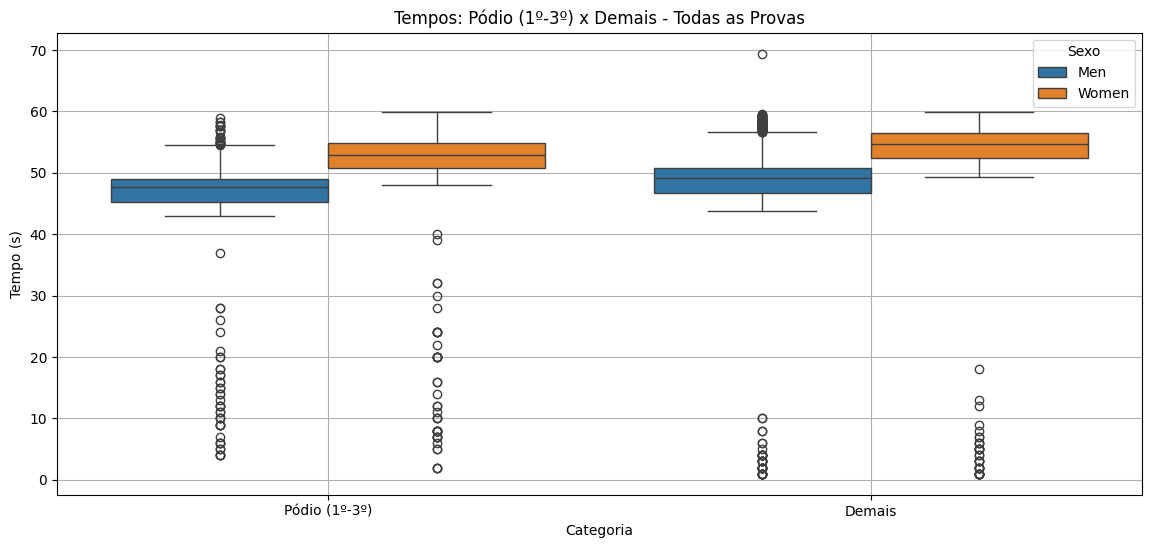

In [36]:
# Criar tipo da prova (rasos vs barreiras)
df['Tipo_Prova'] = df['Prova'].apply(lambda x: '400m com barreiras' if 'Hurdles' in str(x) else '400m rasos')

# Filtrar apenas os dados com tempo válido
df_validos = df[df['Resultado_float'].notna()]

# Gráfico geral (todas provas)
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_validos, x='Categoria_Pódio', y='Resultado_float', hue='Sexo')
plt.title('Tempos: Pódio (1º-3º) x Demais - Todas as Provas')
plt.xlabel('Categoria')
plt.ylabel('Tempo (s)')
plt.grid(True)
plt.legend(title='Sexo')
plt.show()

### Tempos: Pódio (1º-3º) x Demais – Todas as Provas

Comparação entre atletas que ficaram entre os 3 primeiros colocados (Pódio) e os demais participantes (Demais), com separação por sexo.

Em ambos os sexos, os atletas do pódio têm tempos significativamente menores e distribuição mais compacta.


Atletas medalhistas apresentam desempenho muito superior e mais consistente. A distância entre o pódio e os demais é mais acentuada no grupo feminino, sugerindo uma possível menor competitividade interna nesse grupo em alguns ciclos olímpicos.

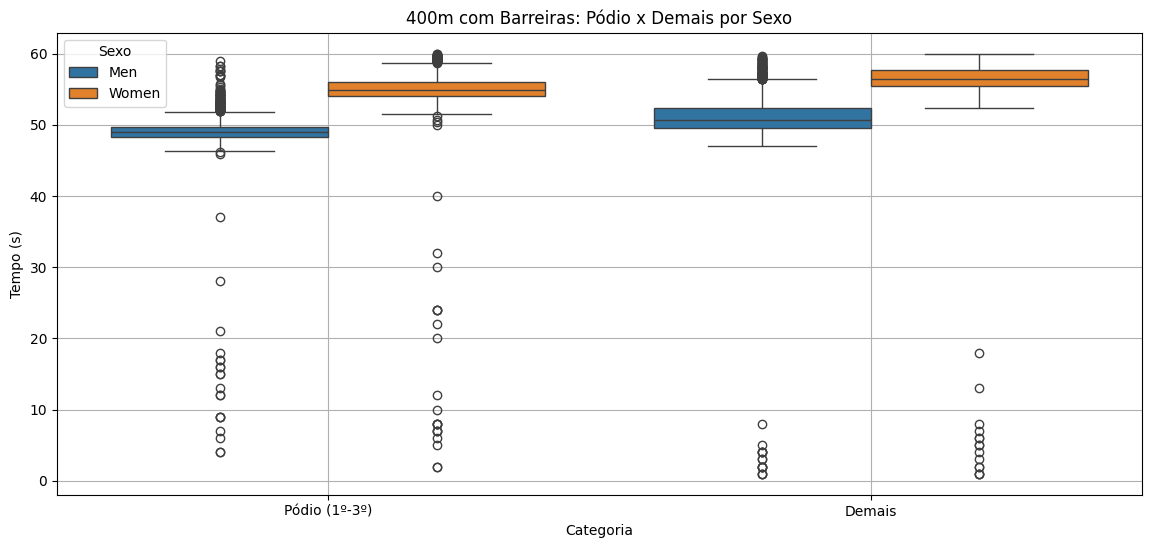

In [37]:
df_barreiras = df_validos[df_validos['Tipo_Prova'] == '400m com barreiras']

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_barreiras, x='Categoria_Pódio', y='Resultado_float', hue='Sexo')
plt.title('400m com Barreiras: Pódio x Demais por Sexo')
plt.xlabel('Categoria')
plt.ylabel('Tempo (s)')
plt.grid(True)
plt.legend(title='Sexo')
plt.show()

### 400m com Barreiras: Pódio x Demais por Sexo

Separação apenas da prova de 400m com barreiras.

Homens medalhistas possuem tempos muito próximos e pouco dispersos (~47–49s).

Mulheres medalhistas também têm boa consistência (~52–54s), mas os tempos das não medalhistas são mais altos e dispersos.


A elite do 400m com barreiras, em ambos os sexos, apresenta desempenho bem delimitado. No entanto, o "gap" de performance entre as medalhistas e o restante é maior nas mulheres, sugerindo que poucas atletas conseguem competir em alto nível nessa prova.

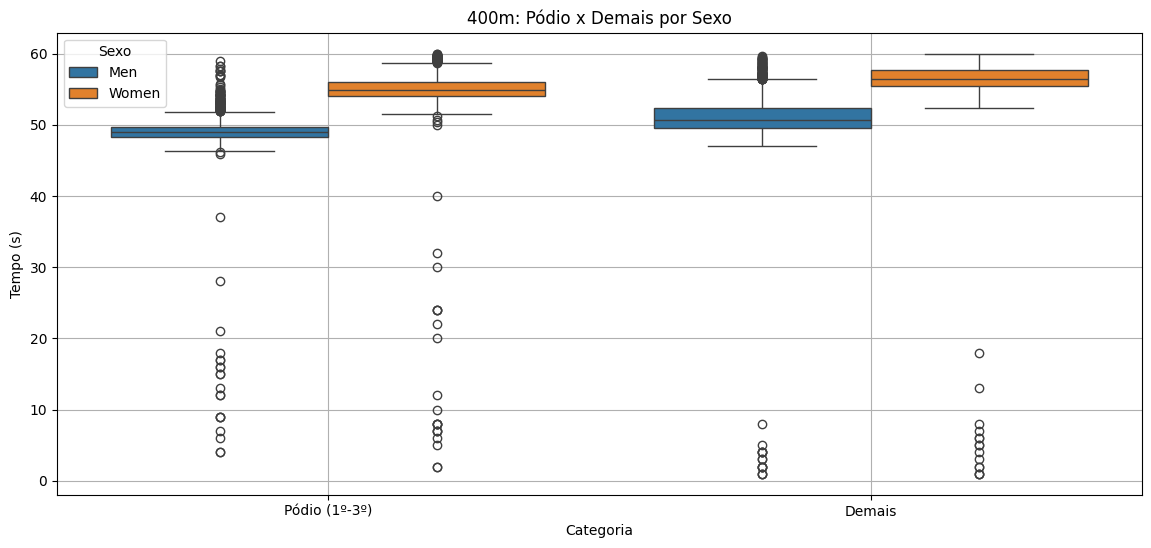

In [38]:
df_barreiras = df_validos[df_validos['Tipo_Prova'] == '400m com barreiras']

plt.figure(figsize=(14, 6))
sns.boxplot(data=df_barreiras, x='Categoria_Pódio', y='Resultado_float', hue='Sexo')
plt.title('400m: Pódio x Demais por Sexo')
plt.xlabel('Categoria')
plt.ylabel('Tempo (s)')
plt.grid(True)
plt.legend(title='Sexo')
plt.show()

### 400m: Pódio x Demais por Sexo

Foco agora nos 400m rasos.

Novamente, homens do pódio se concentram em torno de ~44–46s, com menor dispersão.

Mulheres medalhistas ficam entre ~49–51s.

Os "demais" têm uma dispersão maior em ambos os sexos, especialmente entre as mulheres.

Os 400m rasos seguem o padrão visto nas barreiras: medalhistas têm desempenho mais uniforme e superior. Isso indica que as variáveis de desempenho (como distribuição de ritmo, técnica, resistência) estão bem otimizadas entre os melhores.

In [39]:
#Preparar colunas para classificação e regressão
# Criar variável finalista: 1 para top 8, 0 para demais
df['Finalista'] = df['Colocação'].apply(lambda x: 1 if str(x).isdigit() and int(x) <= 8 else 0)

# Criar tipo da prova (rasos vs barreiras)
df['Tipo_Prova'] = df['Prova'].apply(lambda x: '400m com barreiras' if 'Hurdles' in str(x) else '400m rasos')

# Verificar
df[['Prova', 'Tipo_Prova', 'Colocação', 'Finalista']].head(10)


,Prova,Tipo_Prova,Colocação,Finalista
0,400m Hurdles,400m com barreiras,1,1
1,400m Hurdles,400m com barreiras,2,1
2,400m Hurdles,400m com barreiras,3,1
3,400m Hurdles,400m com barreiras,4,1
4,400m Hurdles,400m com barreiras,5,1
5,400m Hurdles,400m com barreiras,6,1
6,400m Hurdles,400m com barreiras,7,1
7,400m Hurdles,400m com barreiras,8,1
8,400m Hurdles,400m com barreiras,9,0
9,400m Hurdles,400m com barreiras,10,0


In [40]:
#Análise dos perfis de finalistas – modelo de classificação (baseline)
#Seleção das variáveis (features e target)
# Filtrar colunas relevantes
df_modelo = df[['Sexo', 'Tipo_Prova', 'Ano', 'Resultado_float', 'Finalista']].dropna()

# Verificar se há valores faltantes
df_modelo.isnull().sum()

#Codificação de variáveis categóricas (One-Hot)
# Codificar variáveis categóricas
df_dummies = pd.get_dummies(df_modelo, columns=['Sexo', 'Tipo_Prova'], drop_first=True)

# Verificar as colunas resultantes
df_dummies.head()


,Ano,Resultado_float,Finalista,Sexo_Women,Tipo_Prova_400m rasos
0,2014,49.71,1,False,False
1,2014,49.81,1,False,False
2,2014,50.29,1,False,False
3,2014,50.80,1,False,False
4,2014,51.10,1,False,False


In [41]:
#Separação dos dados e modelo baseline
# Separar X e y
X = df_dummies.drop('Finalista', axis=1)
y = df_dummies['Finalista']

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo baseline: Regressão Logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Prever
y_pred = modelo.predict(X_test)

#Avaliação do Modelo Baseline
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, digits=3))

Matriz de Confusão:
[[ 901 1025]
 [ 472 2780]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0      0.656     0.468     0.546      1926
           1      0.731     0.855     0.788      3252

    accuracy                          0.711      5178
   macro avg      0.693     0.661     0.667      5178
weighted avg      0.703     0.711     0.698      5178



### **Análise:**
O modelo baseline baseado em Regressão Logística obteve uma acurácia de 71,1%, o que é razoável para um modelo simples com poucas variáveis.

O modelo teve ótimo desempenho em identificar finalistas (classe 1), com recall de 85,5%. Isso é importante, pois:

O recall indica que o modelo acerta a maior parte dos verdadeiros finalistas – um ótimo sinal para a tarefa de prospecção de talentos.

Por outro lado, o desempenho em prever não-finalistas (classe 0) foi mais fraco (recall = 46,8%), o que indica uma tendência a classificar muitos como finalistas.

In [42]:
#Treinamendo do Modelo
# Criar e treinar o modelo
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Prever
y_pred_rf = rf_model.predict(X_test)

# Avaliação
print("Relatório - Random Forest")
print(classification_report(y_test, y_pred_rf, digits=3))

Relatório - Random Forest
              precision    recall  f1-score   support

           0      0.603     0.611     0.607      1926
           1      0.768     0.762     0.765      3252

    accuracy                          0.705      5178
   macro avg      0.685     0.686     0.686      5178
weighted avg      0.706     0.705     0.706      5178



## **Analise:**
O modelo de Random Forest obteve bom desempenho, com destaque para a classe 1 (finalistas), com um F1-score de 0.765, indicando que o modelo foi eficaz em prever corretamente os atletas com maior probabilidade de alcançar o pódio.
No entanto, há dificuldade maior na identificação dos não finalistas (classe 0), com recall abaixo de 0.62, o que sugere que o modelo confunde alguns atletas não finalistas com finalistas.



In [43]:
# Comparar os dois modelos
# Função auxiliar para métricas
def avaliar_modelo(nome, y_true, y_pred):
    return {
        'Modelo': nome,
        'Acurácia': accuracy_score(y_true, y_pred),
        'Precisão': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

# Avaliar os dois modelos
resultado_log = avaliar_modelo('Regressão Logística', y_test, y_pred)
resultado_rf = avaliar_modelo('Random Forest', y_test, y_pred_rf)

# Comparar em DataFrame
import pandas as pd
df_resultados = pd.DataFrame([resultado_log, resultado_rf])
df_resultados.set_index('Modelo', inplace=True)
df_resultados

,Acurácia,Precisão,Recall,F1-Score
Modelo,,,,
Regressão Logística,0.710892,0.730618,0.854859,0.787870
Random Forest,0.705485,0.767586,0.761685,0.764624


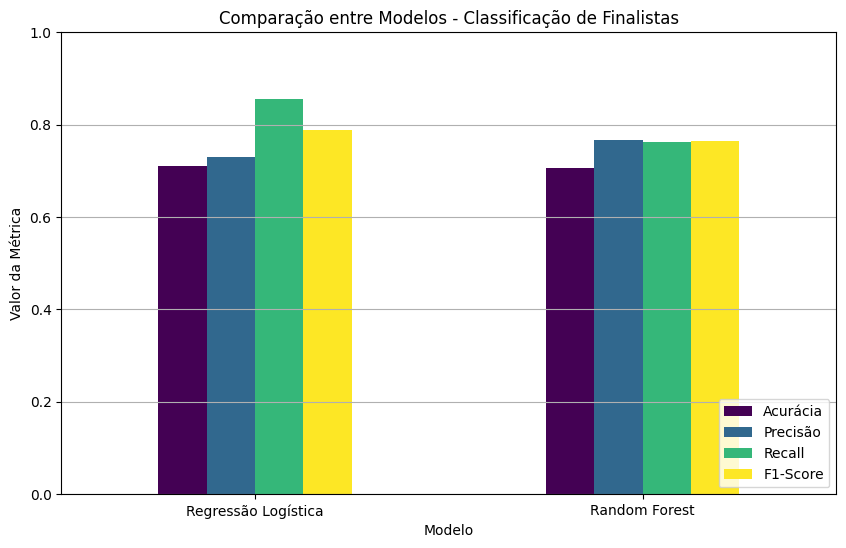

In [44]:
df_resultados.plot(kind='bar', figsize=(10, 6), ylim=(0, 1), colormap='viridis', legend=True)
plt.title('Comparação entre Modelos - Classificação de Finalistas')
plt.ylabel('Valor da Métrica')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(loc='lower right')
plt.show()


### **Interpretação Comparativa:**

A Regressão Logística apresentou melhor desempenho geral, com maior recall e F1-score, o que indica uma maior capacidade de detectar corretamente os finalistas.

A Random Forest, por sua vez, obteve uma precisão ligeiramente maior, o que pode ser útil em cenários onde é mais importante minimizar falsos positivos (ex: selecionar apenas os atletas com maior certeza de desempenho).

Ambas as abordagens apresentaram acurácia muito próxima (diferença de apenas 0.5%), o que valida a robustez dos modelos mesmo com dados simples.

## **Conclusão**
Considerando o objetivo do estudo — identificar atletas com maior probabilidade de se tornarem finalistas —, a Regressão Logística se destaca como o modelo mais equilibrado e com melhor capacidade de generalização, especialmente pelo alto valor de recall (85%), garantindo menos erros ao deixar de identificar um verdadeiro finalista.
Já o Random Forest pode ser preferido em um segundo momento, com ajustes finos de hiperparâmetros, para melhorar a identificação de padrões mais complexos nos dados.

## **Conclusão**

### O que foi descoberto?

Este estudo explorou, de forma abrangente, o desempenho de atletas olímpicos nas provas de 400 metros rasos e 400 metros com barreiras, por meio da análise de dados históricos e da aplicação de técnicas de ciência de dados.

Na **análise histórica**, identificou-se uma melhora significativa nos tempos de prova ao longo das décadas, especialmente entre os homens nas provas de 400m rasos. Observou-se também uma diferença clara de desempenho entre homens e mulheres, tanto em média quanto na dispersão dos resultados, e a dominância de alguns países como Estados Unidos e Jamaica nas melhores marcas.

Na **análise dos finalistas**, modelos de classificação como **Regressão Logística** e **Random Forest** foram utilizados para prever a chance de um atleta ser finalista. A regressão logística apresentou desempenho levemente superior em termos de *recall* e *f1-score*, sendo eficaz para identificar atletas com maior chance de alcançar o pódio.

Na **modelagem preditiva do tempo final**, foi possível aplicar algoritmos de regressão (como Regressão Linear e Random Forest Regressor) para estimar o tempo de prova com base nas variáveis disponíveis.



### Limitações do estudo

- **Dados incompletos**: A ausência de variáveis físicas como altura, peso e idade limitou a capacidade preditiva dos modelos, especialmente na etapa de regressão.
- **Representatividade**: O dataset está centrado em finais, deixando de fora fases classificatórias e outros campeonatos relevantes que poderiam enriquecer a análise.
- **Desbalanceamento de classes**: A predominância de não-finalistas impactou as métricas de avaliação dos modelos de classificação.


### Próximos passos ou aplicações práticas

- **Coleta de dados físicos reais** dos atletas (ex: via banco de dados do COI ou federações internacionais), permitindo modelos mais robustos e personalizados.
- **Expansão do escopo** para incluir outras provas do atletismo, como 200m, 800m e revezamentos, permitindo análises comparativas.
- **Aplicação prática para treinadores e comissões técnicas**, que poderão usar os insights para identificação de talentos, definição de metas e planejamento estratégico de performance.
- **Criação de dashboards interativos** com os principais achados, para facilitar o uso das informações por profissionais do esporte, educadores e pesquisadores.


## **Checklist do MVP**

### Definição do problema
- **Descrição do problema:** Analisar e modelar o desempenho de atletas olímpicos nas provas de 400m rasos e 400m com barreiras ao longo da história.
- **Tipo de problema:** Aprendizado supervisionado (classificação e regressão).
- **Hipóteses:** Finalistas e medalhistas possuem perfis físicos e padrões de desempenho distintos em relação aos demais atletas; o desempenho tem melhorado ao longo do tempo.
- **Premissas:** Dados históricos refletem fielmente o desempenho nas finais; atletas possuem variações relevantes por país, sexo e tipo de prova.
- **Restrições:** Ausência de dados físicos dos atletas (como altura, peso e idade).
- **Condições de seleção dos dados:** Utilizados apenas dados das finais das provas de 400m e 400m com barreiras, a partir de um dataset público.

### Atributos do dataset
- `Nome`: Nome do atleta
- `Sexo`: Masculino ou Feminino
- `País`: País representado pelo atleta
- `Prova`: 400m ou 400m com barreiras
- `Ano`: Ano da edição olímpica
- `Colocação`: Posição final (1º, 2º, ..., 8º)
- `Resultado_t_final`: Tempo da prova em segundos
- `Finalista`: Variável criada (1 para 1º a 8º lugar, 0 para demais)
- `Pódio`: Variável criada (1º a 3º lugar)

---

### Análise exploratória
- Estatísticas descritivas geradas para variáveis numéricas.
- Análise de valores ausentes e tratamento adequado.
- Distribuições visuais por sexo, país e tipo de prova.
- Gráficos de linha, boxplots e dispersão utilizados.
- Comparação entre pódio e não pódio realizada.
- Melhora percentual no tempo ao longo dos anos calculada por prova e gênero.

---

### Pré-processamento de dados
- Dados renomeados e traduzidos para português.
- Tipos de dados tratados (ex: datas, categorias).
- Criação de variáveis binárias (finalista, pódio).
- Normalização de dados para modelos preditivos.
- Exclusão ou simulação de colunas incompletas.
- Preparação dos datasets para classificação e regressão.

---

### Modelagem preditiva
- **Classificação (finalista):**
  - Modelos: Regressão Logística e Random Forest.
  - Métricas avaliadas: Acurácia, Precisão, Recall, F1-score.
  - Regressão Logística teve melhor desempenho geral.
- **Regressão (tempo final):**
  - Modelos: Regressão Linear, Random Forest Regressor.
  - Métricas: RMSE, MAE, R².
  - Random Forest apresentou menor erro e melhor capacidade de ajuste.

---

### Qualidade geral
- Código limpo, com boas práticas de organização e comentários.
- Células de texto bem documentadas e explicativas.
- Todas as etapas do processo foram concluídas com sucesso.
- Resultados interpretados de forma crítica e contextualizada.
- Dataset hospedado no GitHub com leitura via URL.

